In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as ob
import plotly.express as px

%matplotlib inline

In [2]:
color_blue = '#697AF5'
color_purp = '#A37DF5'
color_seblue = '#58A1E8'
light = '#EBBDFF'

colors = [color_blue,color_purp,light,color_seblue]

In [3]:
df = pd.read_csv('product.csv', parse_dates = True, infer_datetime_format = True)
df.head()

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0


In [4]:
df.drop('page_id', axis= 1 , inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   order_id      object
 1   user_id       object
 2   product       object
 3   site_version  object
 4   time          object
 5   title         object
 6   target        int64 
dtypes: int64(1), object(6)
memory usage: 452.4+ MB


In [5]:
print(f"There is {df.isna().sum()} null values")
print(f"There is {df.duplicated().sum()} duplicated rows")

There is order_id        0
user_id         0
product         0
site_version    0
time            0
title           0
target          0
dtype: int64 null values
There is 0 duplicated rows


In [8]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
8471215    False
8471216    False
8471217    False
8471218    False
8471219    False
Length: 8471220, dtype: bool

In [9]:
df.drop_duplicates()

,order_id,user_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0
...,...,...,...,...,...,...,...
8471215,70c275428b8d53eef294d0529253b694,59e736f90b5f8003072bf0eb271ddb86,accessories,desktop,2019-05-23 14:07:00,banner_show,0
8471216,94c9a2a0c11c2b88e49c13e401608c86,69d73bfcaaa83217c903627e602ae01c,clothes,mobile,2019-05-28 08:10:20,banner_show,0
8471217,862568e6013bc378b06f43c3e466521a,61728d26a9c9feb9e128c17b400062c8,sports_nutrition,mobile,2019-05-20 09:20:50,banner_show,0
8471218,7c70b42806372ba85f47a3956f23a114,f90e8c3bcf3867e65d62a2a08189a35a,sneakers,mobile,2019-05-28 19:25:42,banner_show,0


In [12]:
df['time']=pd.to_datetime(df['time'])

In [13]:
df.head()

,order_id,user_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0


In [14]:
df.user_id.nunique(),df.user_id.count()

(4254619, 8471220)

In [ ]:
#ways to index
#(1)df['colname']/df[['colname1','colname2']]
#(2)df.colname
#(3)df.iloc[1,2]
#(4)df.loc[row_indexer,column_indexer]

In [19]:
df.target.value_counts(normalize=True)*100

0    97.063918
1     2.936082
Name: target, dtype: float64

In [23]:
df.groupby('site_version').target.value_counts('target')


site_version  target
desktop       0         0.944109
              1         0.055891
mobile        0         0.981023
              1         0.018977
Name: target, dtype: float64

In [25]:
p_version = df.site_version.value_counts(normalize= True)
p_version

mobile     0.718708
desktop    0.281292
Name: site_version, dtype: float64

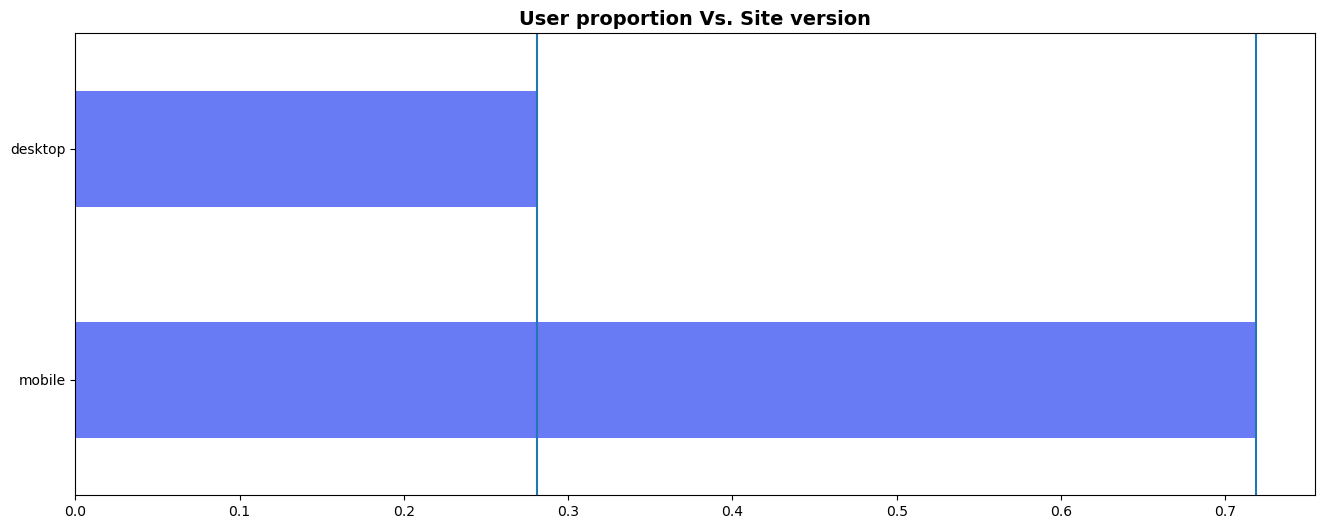

In [28]:
p_version.plot(kind= 'barh', figsize= (16,6), color = color_blue)

plt.title('User proportion Vs. Site version', fontweight= "bold", fontsize= 14)

plt.axvline(p_version[1])
plt.axvline(p_version[0])


In [29]:
rates = (df.groupby(['site_version']).title.value_counts('site_version')*100).unstack()
rates
#unstack Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.


title,banner_click,banner_show,order
site_version,,,
desktop,4.828810,89.582124,5.589065
mobile,11.729299,86.372957,1.897744


Text(0, 0.5, 'Percentage User')

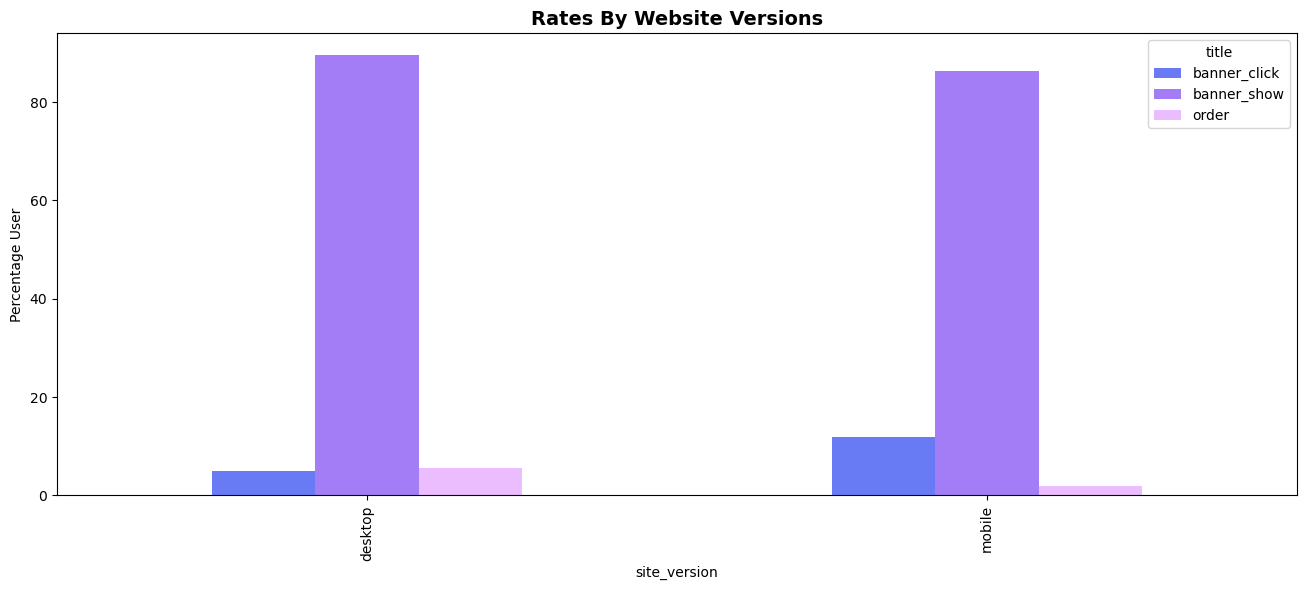

In [30]:
rates.plot(kind= 'bar' , figsize = (16,6),color = colors)

plt.title('Rates By Website Versions',fontweight="bold",size=14)
plt.ylabel('Percentage User')


In [31]:
desk = df[df['site_version'] == 'desktop']
mob = df[df['site_version'] == 'mobile']

In [32]:
desk[desk['title'] == 'order'].shape[0]/desk[desk['title'] == 'banner_click'].shape[0]



1.1574414461391387

In [34]:
5.589065/4.828810

1.1574414814415974

In [33]:
mob[mob['title'] == 'order'].shape[0]/mob[mob['title'] == 'banner_click'].shape[0]



0.1617951629910421

In [35]:
df['product'].value_counts(normalize= True)



clothes             0.210883
company             0.203637
sneakers            0.201074
sports_nutrition    0.192962
accessories         0.191443
Name: product, dtype: float64

In [36]:
converted = df.query('target == 1')
converted.head()
# equivalent to df[df['target']==1]

,order_id,user_id,product,site_version,time,title,target
60,072b030ba126b2f4b2374f342be9ed44,3c59dc048e8850243be8079a5c74d079,sports_nutrition,desktop,2019-03-03 10:15:41,order,1
106,f0935e4cd5920aa6c7c996a5ee53a70f,1c383cd30b7c298ab50293adfecb7b18,sneakers,desktop,2019-02-08 21:16:48,order,1
107,a97da629b098b75c294dffdc3e463904,1c383cd30b7c298ab50293adfecb7b18,clothes,desktop,2019-02-10 19:12:07,order,1
165,9766527f2b5d3e95d4a733fcfb77bd7e,d82c8d1619ad8176d665453cfb2e55f0,sports_nutrition,mobile,2019-02-06 10:32:36,order,1
179,8f53295a73878494e9bc8dd6c3c7104f,b53b3a3d6ab90ce0268229151c9bde11,accessories,mobile,2019-02-10 19:18:02,order,1


In [37]:
converted.groupby('site_version').product.value_counts(normalize= True).unstack()



product,accessories,clothes,sneakers,sports_nutrition
site_version,,,,
desktop,0.166097,0.502902,0.244517,0.086484
mobile,0.194130,0.395859,0.304256,0.105755


Text(0, 0.5, 'Percentage User')

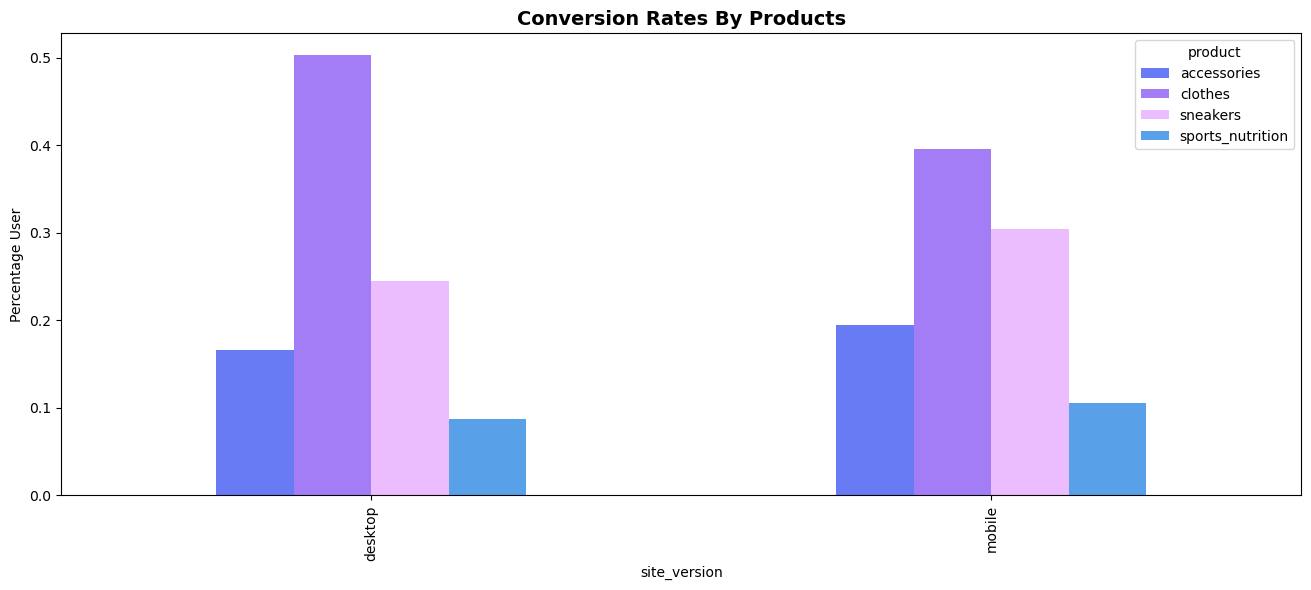

In [38]:
converted.groupby('site_version').product.value_counts(normalize= True).unstack().plot(kind= 'bar', figsize= (16,6), color = colors)
plt.title('Conversion Rates By Products',fontweight="bold",size=14)
plt.ylabel('Percentage User')


In [39]:
prod_trends = df.copy()
prod_trends['date'] = prod_trends['time'].dt.date
prod_trends['weekday'] = prod_trends['time'].dt.day_name()
prod_trends['hour'] = prod_trends['time'].dt.hour

prod_trends.head()

,order_id,user_id,product,site_version,time,title,target,date,weekday,hour
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0,2019-01-11,Friday,9
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0,2019-01-09,Wednesday,9
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0,2019-01-09,Wednesday,9
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0,2019-01-03,Thursday,8
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0,2019-01-03,Thursday,8


In [40]:
mobile = prod_trends[prod_trends['site_version'] == 'mobile']
desk = prod_trends[prod_trends['site_version'] == 'desktop']
desk.head()



,order_id,user_id,product,site_version,time,title,target,date,weekday,hour
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,sneakers,desktop,2019-01-11 09:24:43,banner_click,0,2019-01-11,Friday,9
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,sneakers,desktop,2019-01-09 09:38:51,banner_show,0,2019-01-09,Wednesday,9
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0,2019-01-09,Wednesday,9
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:58:18,banner_show,0,2019-01-03,Thursday,8
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0,2019-01-03,Thursday,8


In [41]:
mob_clicks = mobile[mobile['title'] == 'banner_click']
mobile_prod = mob_clicks.groupby(['date','product']).user_id.agg('nunique')
mobile_prod_df = pd.DataFrame(mobile_prod.unstack(level = 1))

desk_clicks = desk[desk['title'] == 'banner_click']
desk_prod = desk_clicks.groupby(['date','product']).user_id.agg('nunique')
desk_prod_df = pd.DataFrame(desk_prod.unstack(level = 1))

desk_prod_df.head()


product,accessories,clothes,company,sneakers,sports_nutrition
date,,,,,
2019-01-01,80,105,95,81,55
2019-01-02,72,112,116,102,52
2019-01-03,72,145,109,106,57
2019-01-04,91,147,114,97,66
2019-01-05,78,177,121,114,70


In [42]:
def trend_time(data_1, data_2):
    plt.figure(1)

    data_1.plot(figsize = (12,6),color= colors)
    title_1= str(input("title")).title()
    xlabels = str(input("xlable")).title()
    ylabels = str(input("ylabel")).title()
    plt.title(title_1, fontsize = 20, fontweight = 'bold')
    plt.xlabel(xlabels,fontweight = 'bold')
    plt.ylabel(ylabels,fontweight = 'bold')

    plt.figure(2)
    data_2.plot(figsize = (12,6), color= colors)
    title_2= str(input("title")).title()
    plt.title(title_2, fontsize = 20, fontweight = 'bold')
    plt.xlabel(xlabels,fontweight = 'bold')
    plt.ylabel(ylabels,fontweight = 'bold')

    
    plt.show

title product trends(click/mobile)
xlable Date
ylabel unique click
title product trends(click/desk)


<Figure size 640x480 with 0 Axes>

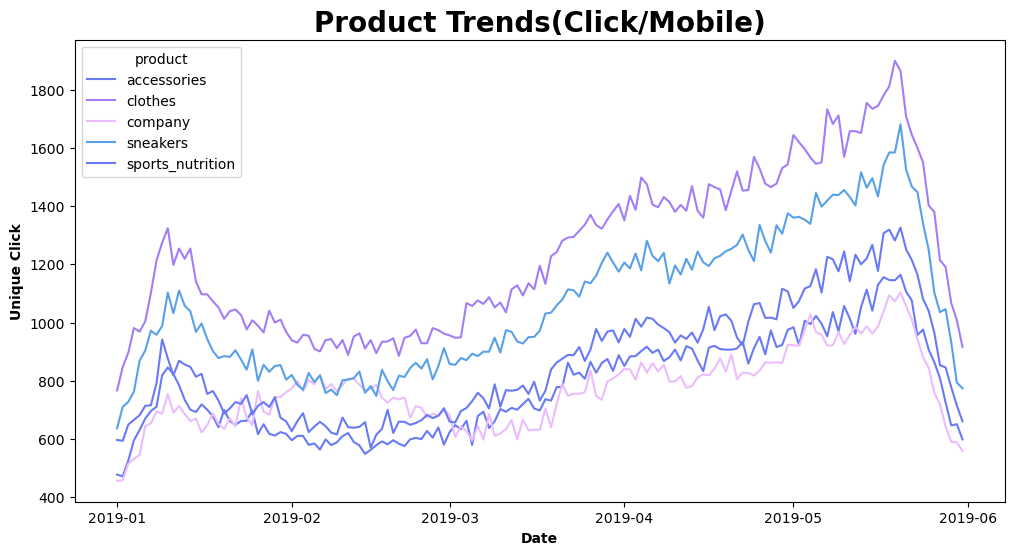

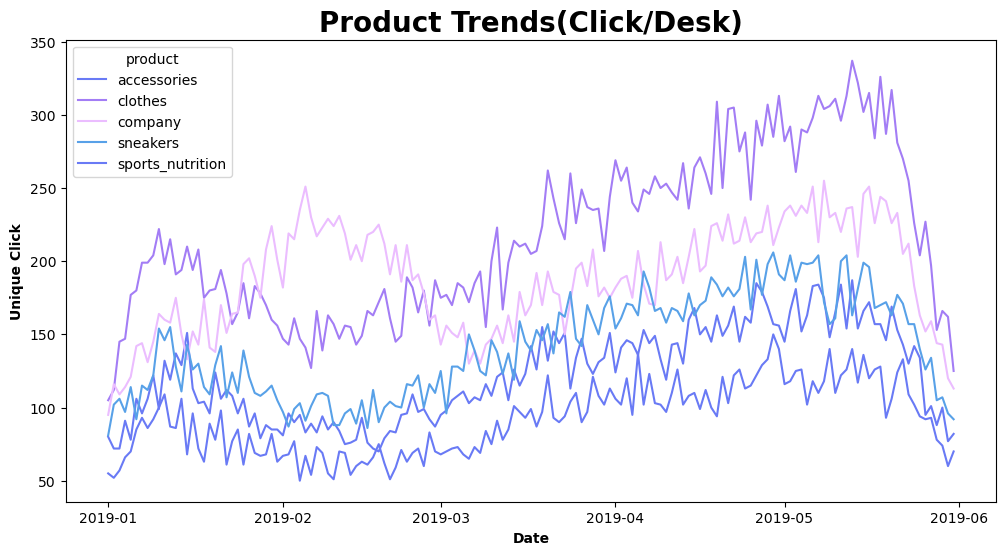

In [43]:
trend_time(mobile_prod_df,desk_prod_df)


In [44]:
mobile_orders = mobile[mobile['target'] == 1]
mobile_orders_prod =mobile.groupby(['date','product']).order_id.agg('nunique')
mobile_orders_prod_df = pd.DataFrame(mobile_orders_prod.unstack(level=1))

desk_orders = desk[desk['target'] == 1]
desk_orders_prod =desk.groupby(['date','product']).order_id.agg('nunique')
desk_orders_prod_df = pd.DataFrame(desk_orders_prod.unstack(level=1))


title product trend(order/mobile))
xlable date
ylabel unique order
title product trend(order/desktop)


<Figure size 640x480 with 0 Axes>

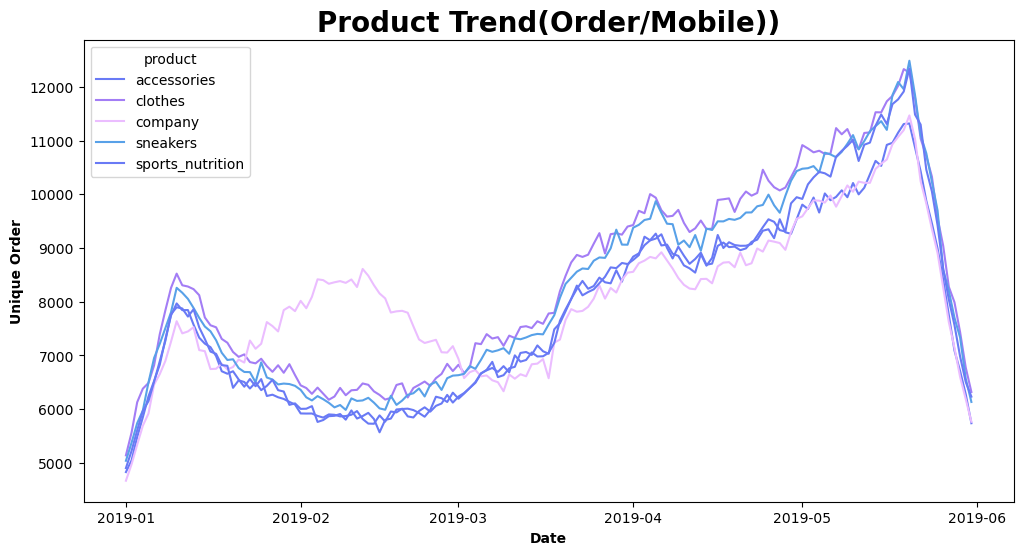

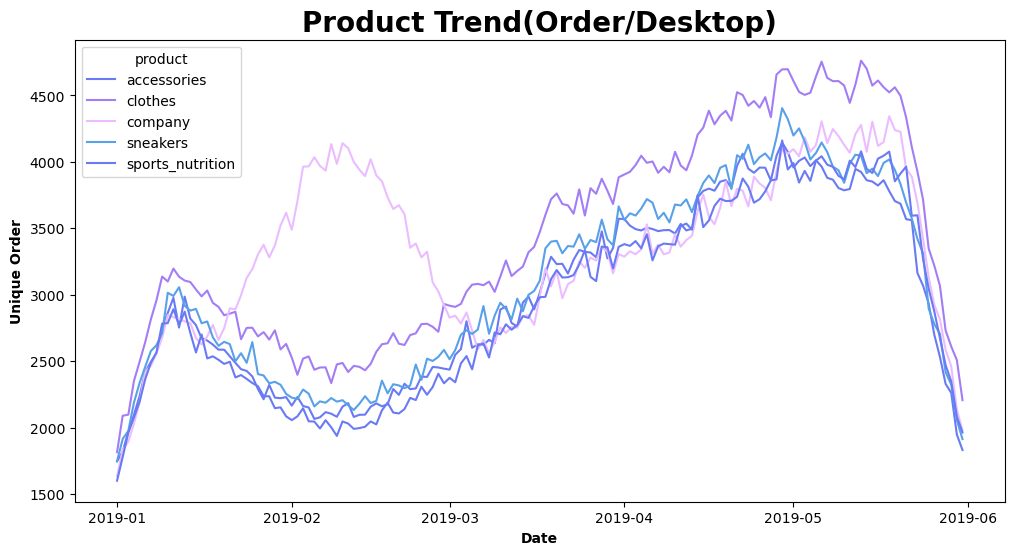

In [45]:
trend_time(mobile_orders_prod_df,desk_orders_prod_df)


In [46]:
df_sorted = df.sort_values(['user_id','time'], ascending = True)


In [47]:
import datetime as dt
def get_mon (x):
    return dt.datetime(x.year, x.month,1)

In [48]:
s_df = df_sorted.copy()
s_df['weekday'] = s_df['time'].dt.weekday

In [49]:
s_df_desktop = s_df[s_df['site_version'] == 'desktop']
s_df_mob = s_df[s_df['site_version'] == 'mobile']

In [50]:
s_df_desktop['event_month'] = s_df_desktop['time'].apply(get_mon)
s_df_mob['event_month'] = s_df_mob['time'].apply(get_mon)

#dataframe.apply(func,axis=0),if no axis, the func could be applied to every value in dataframe. But if the function is the aggregation func, the axis must be identified



/var/folders/rh/kyt_b0_x2b5_v2s3kdr82sqw0000gn/T/ipykernel_3322/2776350075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_df_desktop['event_month'] = s_df_desktop['time'].apply(get_mon)
/var/folders/rh/kyt_b0_x2b5_v2s3kdr82sqw0000gn/T/ipykernel_3322/2776350075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_df_mob['event_month'] = s_df_mob['time'].apply(get_mon)


In [52]:
s_df_mob['acquired_date'] = s_df_mob.groupby('user_id')['event_month'].transform('min')
s_df_mob


/var/folders/rh/kyt_b0_x2b5_v2s3kdr82sqw0000gn/T/ipykernel_3322/3825902805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_df_mob['acquired_date'] = s_df_mob.groupby('user_id')['event_month'].transform('min')


,order_id,user_id,product,site_version,time,title,target,weekday,event_month,acquired_date
8085897,7628fb882a96b42d8bbfa1ecd2932599,000009891526c0ade7180f8423792063,sneakers,mobile,2019-05-26 06:40:32,banner_show,0,6,2019-05-01,2019-05-01
6299880,1364bf655cee9a2c7945425fd159aafb,0000174d1d38072889d47e51b587a10c,sports_nutrition,mobile,2019-05-19 08:59:48,banner_show,0,6,2019-05-01,2019-05-01
6299879,7dd2370a64ec85dd99138973bcf2f2a7,0000174d1d38072889d47e51b587a10c,company,mobile,2019-05-21 12:45:51,banner_show,0,1,2019-05-01,2019-05-01
1756225,09d2a46d23d30f968c63ef175a942677,0000193a728fd00b6cff91b8840bbf8d,accessories,mobile,2019-01-15 06:02:30,banner_show,0,1,2019-01-01,2019-01-01
1756223,462650e4212d0e17a8c8711953fc7fda,0000193a728fd00b6cff91b8840bbf8d,accessories,mobile,2019-01-18 11:37:02,banner_show,0,4,2019-01-01,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
6410974,217fc110ab71e626cd6fa97aee98dbcd,fffff9055756ed29a5aa13ee8e222ac8,company,mobile,2019-03-31 10:22:39,banner_show,0,6,2019-03-01,2019-03-01
6410975,5d9e14f1678813bee7fb4f85bca6f80f,fffff9055756ed29a5aa13ee8e222ac8,company,mobile,2019-03-31 10:22:45,banner_click,0,6,2019-03-01,2019-03-01
1894661,e1523496289ab20387993c82bc3670d0,fffffa6bed6b7780465149fab05cf406,sneakers,mobile,2019-01-15 11:58:53,banner_show,0,1,2019-01-01,2019-01-01
1894662,0790d48907bcf89bc74b81eb5b341d16,fffffa6bed6b7780465149fab05cf406,clothes,mobile,2019-01-25 02:06:34,banner_show,0,4,2019-01-01,2019-01-01


In [ ]:
# the affect of dataframe.groupby('a')['c'].transform(sum) the group 'a' is all same for the sum of c.


Text(0, 0.5, 'Number Of Unique Orders')

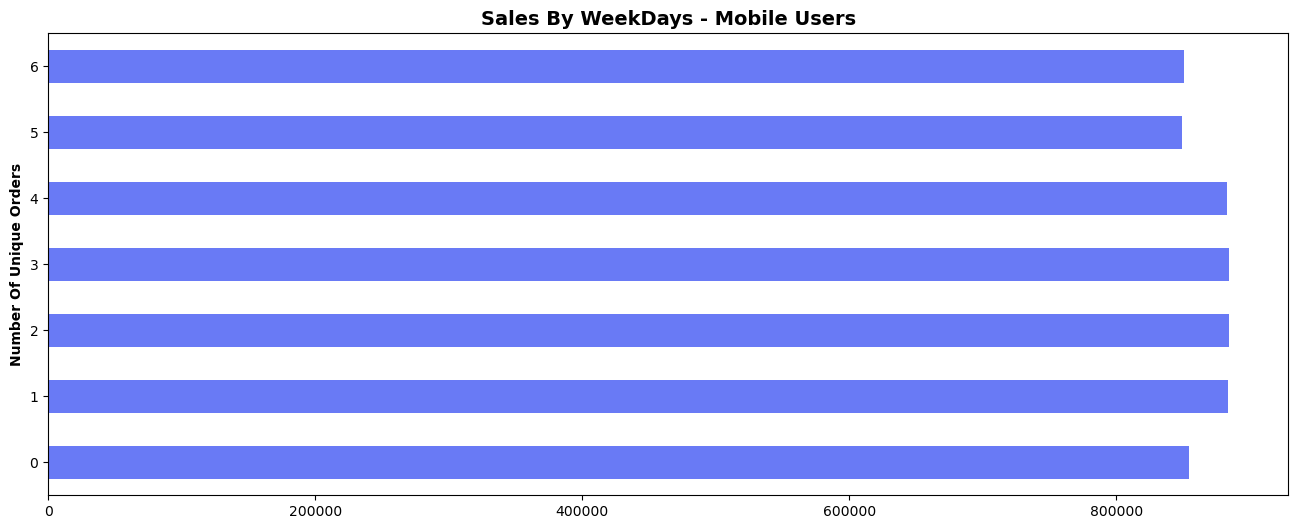

In [53]:
day_mob = s_df_mob.groupby('weekday').order_id.nunique()
day_mob.plot(kind = 'barh', figsize= (16,6), color= color_blue)
plt.title('Sales By WeekDays - Mobile Users',fontweight="bold",size=14)
plt.ylabel('Number Of Unique Orders',fontweight = 'bold')


Text(0, 0.5, 'Number Of Unique Orders')

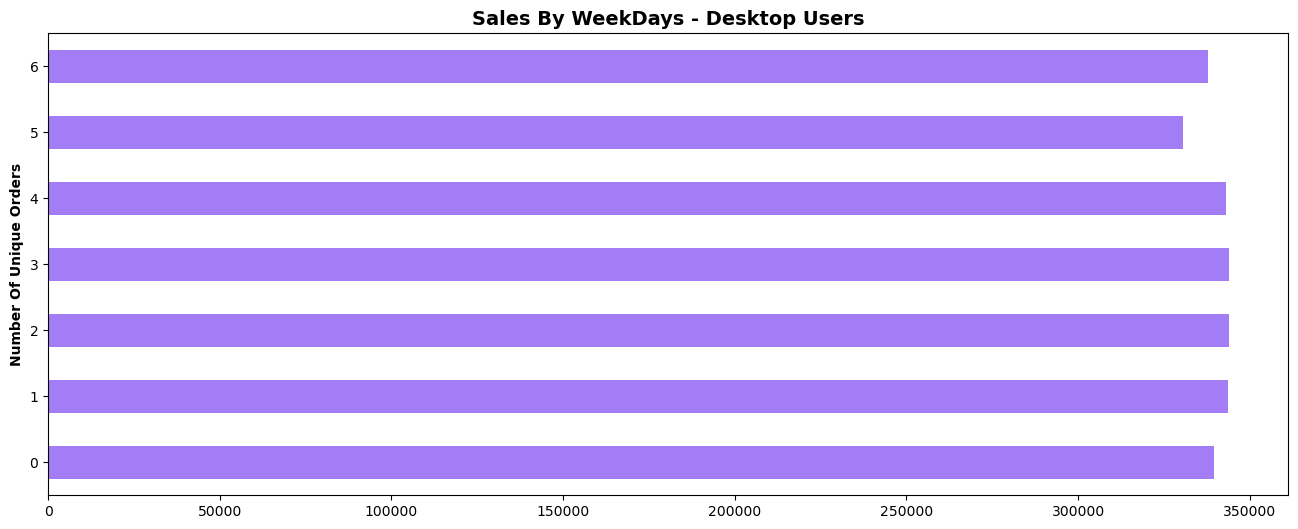

In [54]:
day_desk = s_df_desktop.groupby('weekday').order_id.nunique()
day_desk.plot(kind = 'barh', figsize= (16,6),color= color_purp)
plt.title('Sales By WeekDays - Desktop Users',fontweight="bold",size=14)
plt.ylabel('Number Of Unique Orders',fontweight = 'bold')


,user_id,event_month,target
0,000009891526c0ade7180f8423792063,2019-05-01,0
1,0000174d1d38072889d47e51b587a10c,2019-05-01,0
2,0000193a728fd00b6cff91b8840bbf8d,2019-01-01,0
3,00002783bc5d108510f3f9666c8b1edd,2019-03-01,0
4,00002eb25d60a09c318efbd0797bffb5,2019-05-01,0


In [59]:
purchases_mob = s_df_mob.groupby(['user_id','event_month']).agg({'target' : ['sum']})
purchases_mob


,,target
,,sum
user_id,event_month,
000009891526c0ade7180f8423792063,2019-05-01,0
0000174d1d38072889d47e51b587a10c,2019-05-01,0
0000193a728fd00b6cff91b8840bbf8d,2019-01-01,0
00002783bc5d108510f3f9666c8b1edd,2019-03-01,0
00002eb25d60a09c318efbd0797bffb5,2019-05-01,0
...,...,...
ffffe3323c6b5c056c19b2722c9aacbc,2019-04-01,0
fffff8d603b897bb8655858430adfe40,2019-04-01,0


In [60]:
purchases_mob.columns.droplevel(level=1)

Index(['target'], dtype='object')

In [61]:
purchases_mob
#dataframe.reset_index():reset the index, use the default index, the previous index could be turned into the columns


,,target
,,sum
user_id,event_month,
000009891526c0ade7180f8423792063,2019-05-01,0
0000174d1d38072889d47e51b587a10c,2019-05-01,0
0000193a728fd00b6cff91b8840bbf8d,2019-01-01,0
00002783bc5d108510f3f9666c8b1edd,2019-03-01,0
00002eb25d60a09c318efbd0797bffb5,2019-05-01,0
...,...,...
ffffe3323c6b5c056c19b2722c9aacbc,2019-04-01,0
fffff8d603b897bb8655858430adfe40,2019-04-01,0


In [77]:
# Because users made multiple events, we will aggregate by user id and date, to get if the user converted in a certain month or not
purchases_desk = s_df_desktop.groupby(['user_id','event_month']).agg({'target' : ['sum']})
purchases_desk.columns = purchases_desk.columns.droplevel(level=1)
purchases_desk.reset_index(inplace = True)
purchases_desk.head()

purchases_mob = s_df_mob.groupby(['user_id','event_month']).agg({'target' : ['sum']})
purchases_mob.columns = purchases_mob.columns.droplevel(level=1)
purchases_mob.reset_index(inplace = True)
purchases_mob.head()

,user_id,event_month,target
0,000009891526c0ade7180f8423792063,2019-05-01,0
1,0000174d1d38072889d47e51b587a10c,2019-05-01,0
2,0000193a728fd00b6cff91b8840bbf8d,2019-01-01,0
3,00002783bc5d108510f3f9666c8b1edd,2019-03-01,0
4,00002eb25d60a09c318efbd0797bffb5,2019-05-01,0


In [78]:
purchases_desk = purchases_desk.groupby('event_month').agg({'target' : ['mean']})
purchases_desk.columns = purchases_desk.columns.droplevel(level=1)
purchases_desk.reset_index(inplace = True)
purchases_desk

purchases_mob = purchases_mob.groupby('event_month').agg({'target' : ['mean']})
purchases_mob.columns = purchases_mob.columns.droplevel(level=1)
purchases_mob.reset_index(inplace = True)
purchases_mob



,event_month,target
0,2019-01-01,0.028331
1,2019-02-01,0.036937
2,2019-03-01,0.036306
3,2019-04-01,0.036577
4,2019-05-01,0.029672


In [79]:
conv_mob = s_df_mob.set_index('time').groupby(
    pd.Grouper(freq='M')
).agg({'target' : ['mean']}).reset_index()



conv_desk = s_df_desktop.set_index('time').groupby(
    pd.Grouper(freq='M')
).agg({'target' : ['mean']}).reset_index()


Text(0, 0.5, 'Conversion Rates')

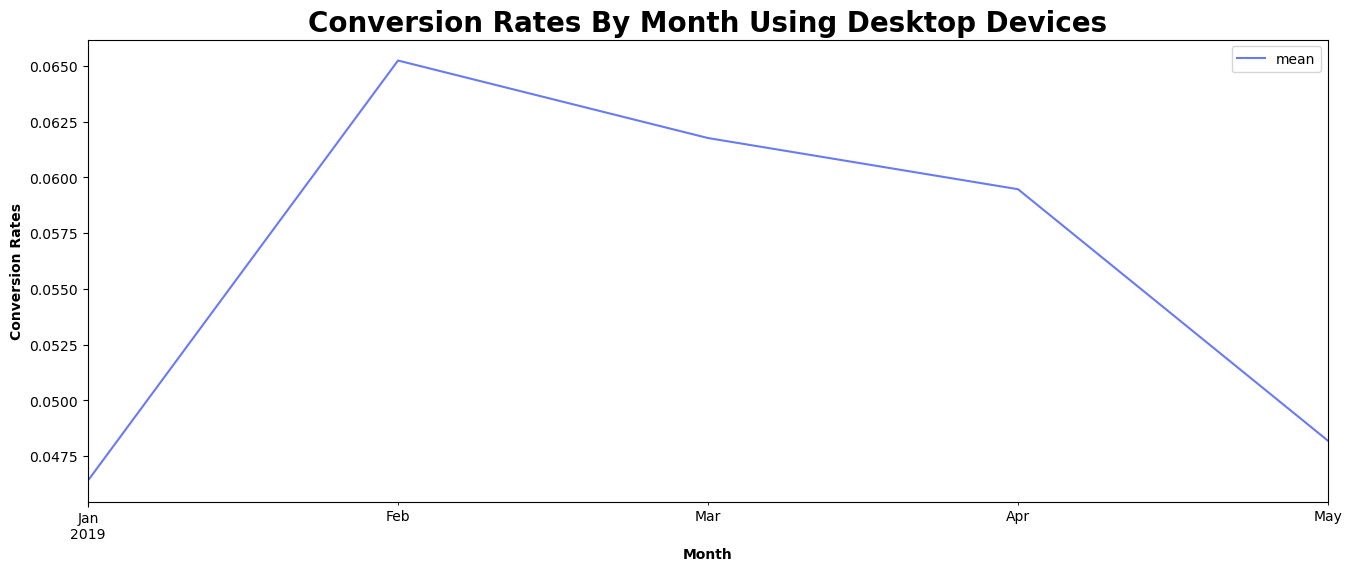

In [80]:
conv_desk.plot(x= 'time',
               y= 'target', figsize= (16,6), color = colors)
plt.title("Conversion Rates By Month Using Desktop Devices", fontsize = 20, fontweight = 'bold')
plt.xlabel('Month',fontweight = 'bold')
plt.ylabel('Conversion Rates',fontweight = 'bold')

Text(0, 0.5, 'Conversion Rates')

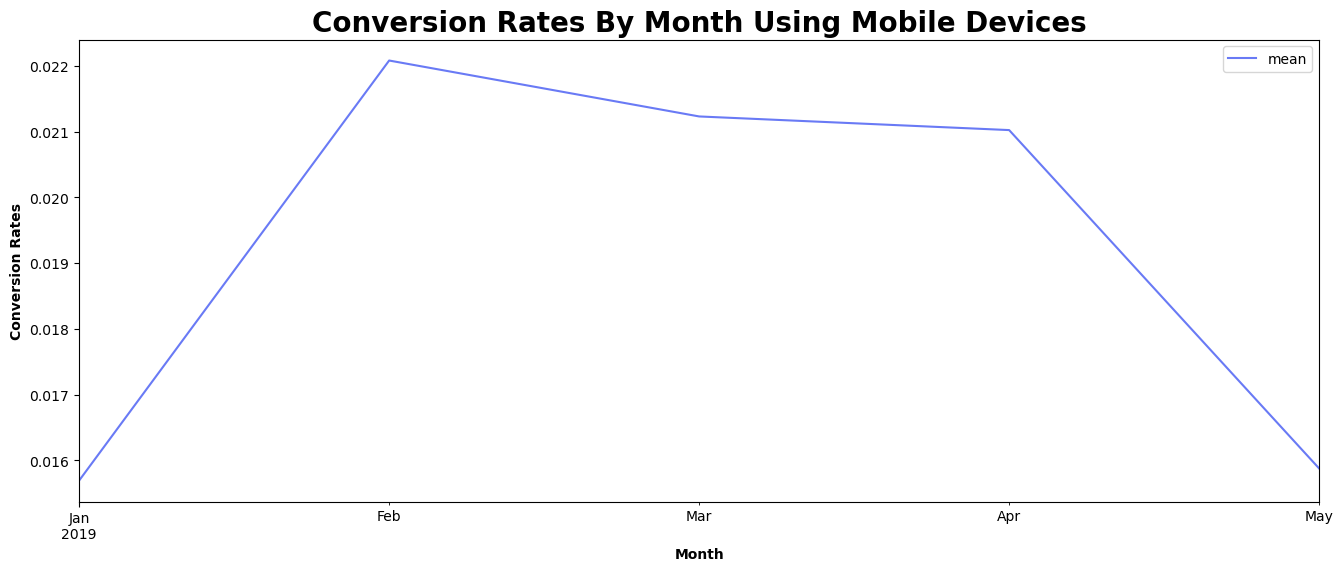

In [81]:
conv_mob.plot(x= 'time',y= 'target', figsize= (16,6), color = colors)
plt.title("Conversion Rates By Month Using Mobile Devices", fontsize = 20, fontweight = 'bold')
plt.xlabel('Month',fontweight = 'bold')
plt.ylabel('Conversion Rates',fontweight = 'bold')

In [82]:
df_sorted['events'] = df_sorted.groupby('user_id')['user_id'].transform('count')
df_sorted.head()

,order_id,user_id,product,site_version,time,title,target,events
5169060,eb57f32a646ec2bd9c6725a85e8bc03b,0000023f507999464aa2b78875b7e5d6,accessories,desktop,2019-05-14 18:00:05,banner_show,0,1
8085897,7628fb882a96b42d8bbfa1ecd2932599,000009891526c0ade7180f8423792063,sneakers,mobile,2019-05-26 06:40:32,banner_show,0,1
6244959,275d2d45916c32c74e32893af200be9c,00000ce845c00cbf0686c992fc369df4,clothes,desktop,2019-04-27 14:02:23,banner_show,0,1
3868750,998ee74e3a33dfd9eb57de4451f3e4a2,00000f7264c27ba6fea0c837ed6aa0aa,sneakers,desktop,2019-05-19 16:38:05,banner_show,0,1
1986001,14790ffc07acd5a7e74db60c0fde7410,0000104cd168386a335ba6bf6e32219d,accessories,desktop,2019-01-22 12:41:53,banner_show,0,4


In [83]:
multiple_events = df_sorted[df_sorted['events'] > 1]
multiple_events.head()

,order_id,user_id,product,site_version,time,title,target,events
1986001,14790ffc07acd5a7e74db60c0fde7410,0000104cd168386a335ba6bf6e32219d,accessories,desktop,2019-01-22 12:41:53,banner_show,0,4
1986002,1a27283963e6865b708f2a902b6dd909,0000104cd168386a335ba6bf6e32219d,clothes,desktop,2019-03-22 15:22:01,banner_show,0,4
1986003,7cb81abefe28c25433fcf062c6122b9e,0000104cd168386a335ba6bf6e32219d,clothes,desktop,2019-03-22 15:23:33,banner_click,0,4
1986004,7c7ffb8a8c0a6b5347977fa5ed6a4589,0000104cd168386a335ba6bf6e32219d,clothes,desktop,2019-04-12 23:15:50,order,1,4
6299880,1364bf655cee9a2c7945425fd159aafb,0000174d1d38072889d47e51b587a10c,sports_nutrition,mobile,2019-05-19 08:59:48,banner_show,0,2


In [84]:
multiple_events = df_sorted[df_sorted['events'] > 1]
multiple_events.head()

,order_id,user_id,product,site_version,time,title,target,events
1986001,14790ffc07acd5a7e74db60c0fde7410,0000104cd168386a335ba6bf6e32219d,accessories,desktop,2019-01-22 12:41:53,banner_show,0,4
1986002,1a27283963e6865b708f2a902b6dd909,0000104cd168386a335ba6bf6e32219d,clothes,desktop,2019-03-22 15:22:01,banner_show,0,4
1986003,7cb81abefe28c25433fcf062c6122b9e,0000104cd168386a335ba6bf6e32219d,clothes,desktop,2019-03-22 15:23:33,banner_click,0,4
1986004,7c7ffb8a8c0a6b5347977fa5ed6a4589,0000104cd168386a335ba6bf6e32219d,clothes,desktop,2019-04-12 23:15:50,order,1,4
6299880,1364bf655cee9a2c7945425fd159aafb,0000174d1d38072889d47e51b587a10c,sports_nutrition,mobile,2019-05-19 08:59:48,banner_show,0,2


In [86]:
# New column for calculating the time between user events

multiple_events['duration'] = multiple_events.groupby('user_id')['time']\
                                .transform('diff').dt.days\
                                .fillna(0)

# Selecting users whom converted

multiple_events_converted = multiple_events[multiple_events['target']== 1]
multiple_events_converted.head()

KeyboardInterrupt: 

In [ ]:
# This function removes outliers

def truncated_mean(data):
    top = data.quantile(.9)
    low = data.quantile(.1)
    
    trunc_data= data[(data <= top) & (data >= low)]
    mean = trunc_data.mean()
    return(mean)

In [ ]:
multiple_events_converted.groupby('site_version').duration.agg(['mean','median',truncated_mean])


In [ ]:
valse = pd.DataFrame(multiple_events_converted.duration.value_counts().reset_index())
valse.sort_values('duration', ascending = False)
valse.columns = ['days_to_convert','user_count']
valse.head()


In [ ]:
def plot_graph(data,col1,col2):
    
    data.plot(x= col1, y = col2,figsize= (16,8),color= colors)
    plt.title(col1.replace('_',' ') + ' Vs '+ col2.replace('_',' '), fontsize = 20, fontweight = 'bold')
    plt.xlabel(col1.replace('_',' '),fontweight = 'bold')
    plt.ylabel(col2.replace('_',' '),fontweight = 'bold')
    plt.show

In [ ]:
plot_graph(valse,'days_to_convert','user_count')


In [87]:
converted = multiple_events.loc[multiple_events['target'] == 1]
prior_conv = multiple_events.loc[multiple_events['target'].shift(-1) == 1]
merged = converted.merge(prior_conv , how = 'outer', sort = True)
merged['event_product'] = merged['title'] + '_on_' + merged['product']
merged.head()


,order_id,user_id,product,site_version,time,title,target,events,event_product
0,0000180e94707c0d90547614c17076bf,389669ebdb50615ed432a723da11c9c6,sports_nutrition,mobile,2019-01-16 01:08:13,banner_show,0,6,banner_show_on_sports_nutrition
1,0000702ee4cefdb1e7f89084e50d3c85,e76afd80a09bac5ac3395fbaa1dab688,sports_nutrition,mobile,2019-05-24 10:15:59,banner_show,0,2,banner_show_on_sports_nutrition
2,00009007251e61c2ef9184d4b6e6eeec,15c74b74f300f094c0259b3402de9db2,sports_nutrition,desktop,2019-04-22 16:59:29,order,1,3,order_on_sports_nutrition
3,0000c0bdc0f15bd239cfffa884791a10,03f8fc4dcfdebb0841d33df070f1899a,clothes,desktop,2019-04-02 07:37:53,order,1,4,order_on_clothes
4,0000d87a4ed677a8e96236ca7cd84567,a2ae80985f780f6c52503a2e5ca099a6,clothes,desktop,2019-02-01 15:13:49,order,1,2,order_on_clothes


In [ ]:
actions = pd.DataFrame(merged.groupby('user_id').event_product.unique().reset_index())
journey = actions['event_product']

journey = list(journey)